# import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

# helper functions (if necessary)

In [2]:
#python code...

# read in training data

In [3]:
train_df = pd.read_csv('train.csv')

print(train_df.head())

    A   B   C   D   E   F   G  Location
0 -52 -54 -52 -49 -63 -86 -81         3
1 -60 -54 -59 -65 -66 -83 -84         1
2 -60 -55 -46 -59 -49 -87 -83         4
3 -50 -55 -54 -50 -69 -79 -82         3
4 -51 -56 -60 -48 -60 -86 -83         3


# analyze and visualize training data

                 A            B            C            D            E  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean    -52.147500   -55.687500   -54.970625   -53.403750   -62.634375   
std      11.464037     3.418281     5.315889    11.654425     9.076808   
min     -74.000000   -74.000000   -73.000000   -77.000000   -89.000000   
25%     -61.000000   -58.000000   -58.000000   -63.000000   -69.000000   
50%     -55.000000   -56.000000   -55.000000   -56.000000   -64.000000   
75%     -45.000000   -53.000000   -51.000000   -45.750000   -56.000000   
max     -10.000000   -46.000000   -40.000000   -11.000000   -36.000000   

                 F            G     Location  
count  1600.000000  1600.000000  1600.000000  
mean    -80.871875   -81.598125     2.505000  
std       6.603140     6.609192     1.115012  
min     -97.000000   -98.000000     1.000000  
25%     -86.000000   -87.000000     2.000000  
50%     -81.000000   -82.000000     2.500000  
75% 

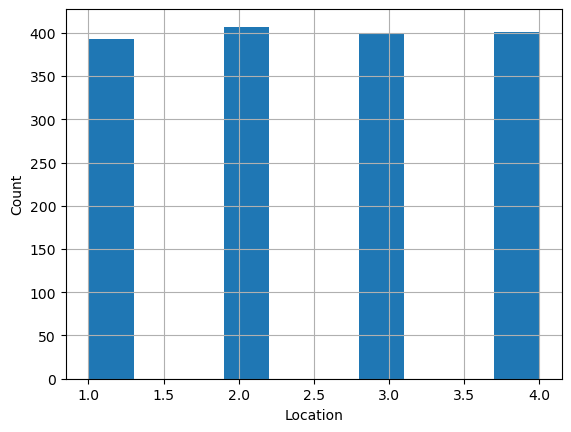

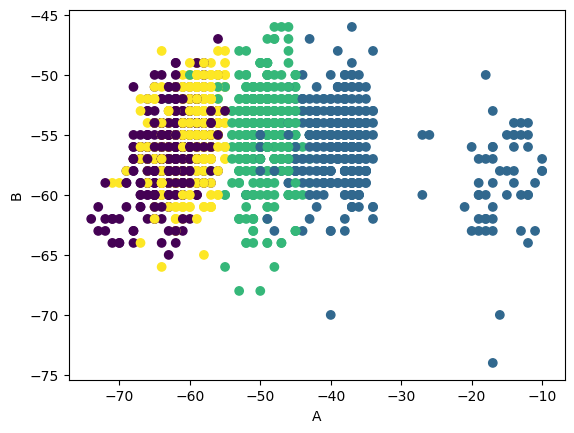

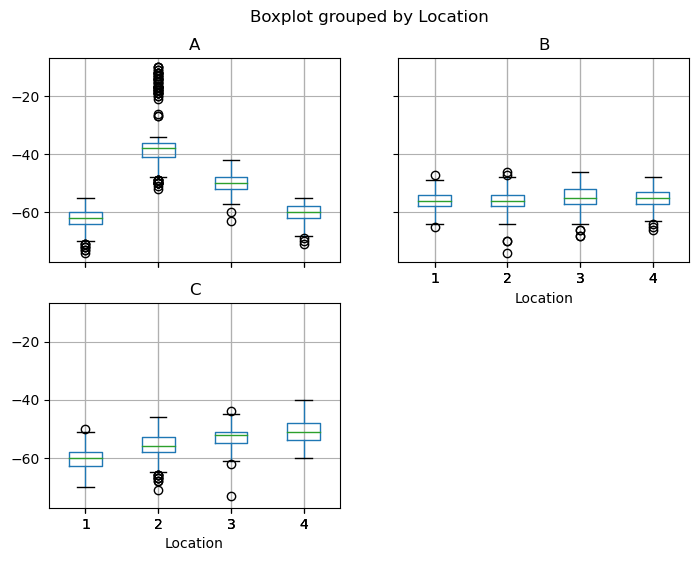

In [4]:
train_df = pd.read_csv('train.csv')

print(train_df.describe())

train_df['Location'].hist(bins=10)
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

plt.scatter(train_df['A'], train_df['B'], c=train_df['Location'])
plt.xlabel('A')
plt.ylabel('B')
plt.show()

train_df.boxplot(column=['A', 'B', 'C'], by='Location', figsize=(8, 6))
plt.show()


# experiment with classification

In [5]:

train_df = pd.read_csv('train.csv')


feature_cols = ['A', 'B', 'C']
feature_combos = []


for i in range(1, len(feature_cols) + 1):
    feature_combos.extend(combinations(feature_cols, i))


for features in feature_combos:
    train_subset = train_df[list(features) + ['Location']]
    X_train = train_subset.drop('Location', axis=1)
    y_train = train_subset['Location']
    clf = SVC(kernel='linear')
    y_pred = cross_val_predict(clf, X_train, y_train, cv=10)
    

    acc = accuracy_score(y_train, y_pred)
    prec = precision_score(y_train, y_pred, average='weighted')
    rec = recall_score(y_train, y_pred, average='weighted')
    
    print('Features:', features)
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print()


Features: ('A',)
Accuracy: 0.79
Precision: 0.7942504408475366
Recall: 0.79

Features: ('B',)
Accuracy: 0.286875
Precision: 0.27046167283473266
Recall: 0.286875

Features: ('C',)
Accuracy: 0.51
Precision: 0.5133981590854261
Recall: 0.51

Features: ('A', 'B')
Accuracy: 0.7825
Precision: 0.7851506544112002
Recall: 0.7825

Features: ('A', 'C')
Accuracy: 0.9
Precision: 0.9006198063303852
Recall: 0.9

Features: ('B', 'C')
Accuracy: 0.525
Precision: 0.5182469950722077
Recall: 0.525

Features: ('A', 'B', 'C')
Accuracy: 0.905
Precision: 0.905373083674761
Recall: 0.905



# Question: Which features and classification model parameters did you select?  Why?

I created a for loop in order to test different features defined as A,B,C in doing this I found that the most accurate result was from combining all 3  into one giving a 90% accracy and 90% precision

# train "fresh" model on training data

In [6]:
X_train = train_df.drop('Location', axis=1)
y_train = train_df['Location']

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

svc_model = SVC()

svc_model.fit(X_train_train, y_train_train)

score = svc_model.score(X_train_val, y_train_val)
print("Accuracy on validation set: {:.2f}%".format(score * 100))


Accuracy on validation set: 97.50%


# read in test data

In [7]:
test_data = pd.read_csv('test.csv')

# run classification model on test data to make predictions

In [8]:
y_test_pred = svc_model.predict(test_data)

test_data['Location'] = y_test_pred
test_data.to_csv('Auer.csv', index=False)

# write test data with predictions to \<YourLastName>.csv

In [9]:
test_data['Location'] = y_test_pred
test_data.to_csv('Auer.csv', index=False)